In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

/home/samuel/xai-health-risk-system/projectenv/lib/python3.12/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [3]:
diabetes_processed = pd.read_csv("../data/processed/diabetes_processed.csv")
heart_disease_processed = pd.read_csv("../data/processed/heart_processed.csv")

In [4]:
heart_disease_processed.head()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
diabetes_processed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Analyzing Feature: Pregnancies
Skewness: 0.8999119408414357


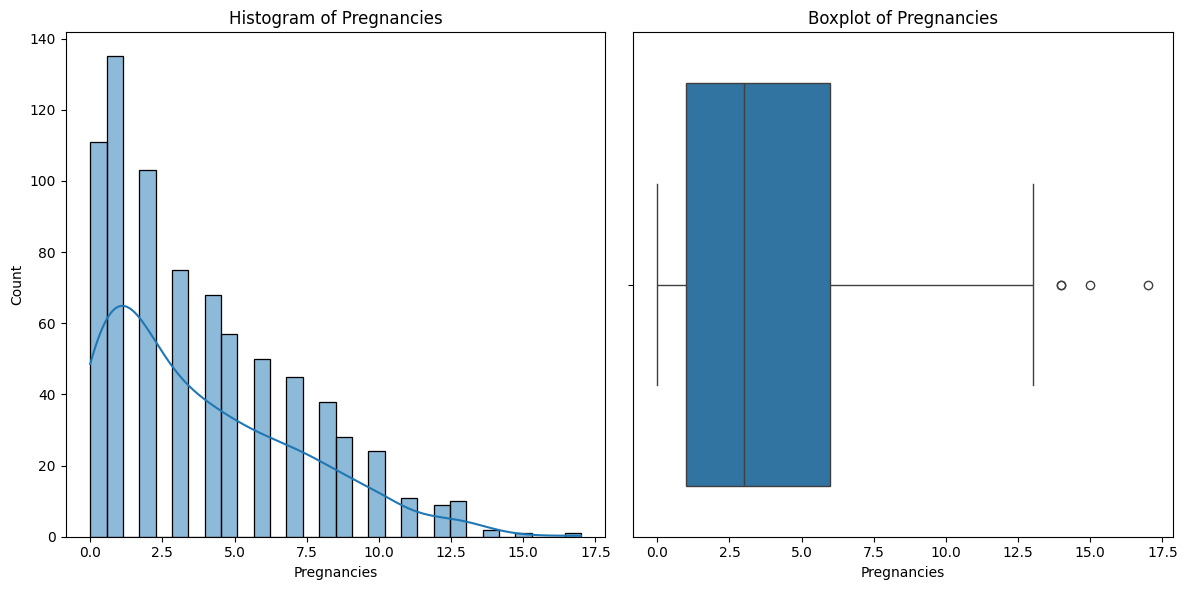

Analyzing Feature: Glucose
Skewness: 0.5345406664125946


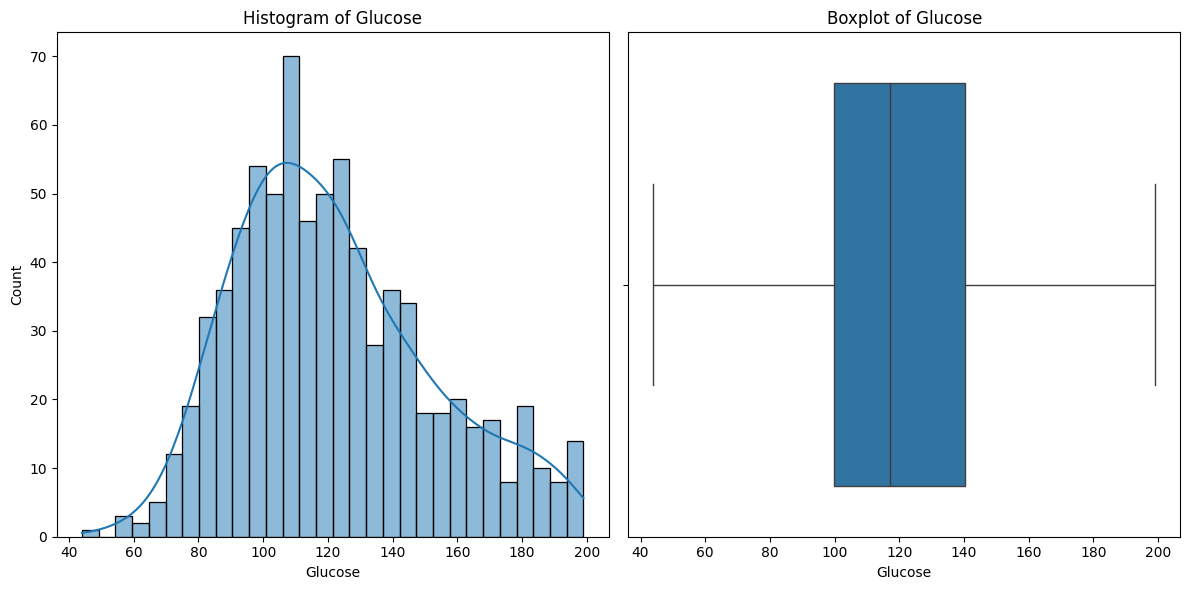

Analyzing Feature: BloodPressure
Skewness: 0.14160775043921206


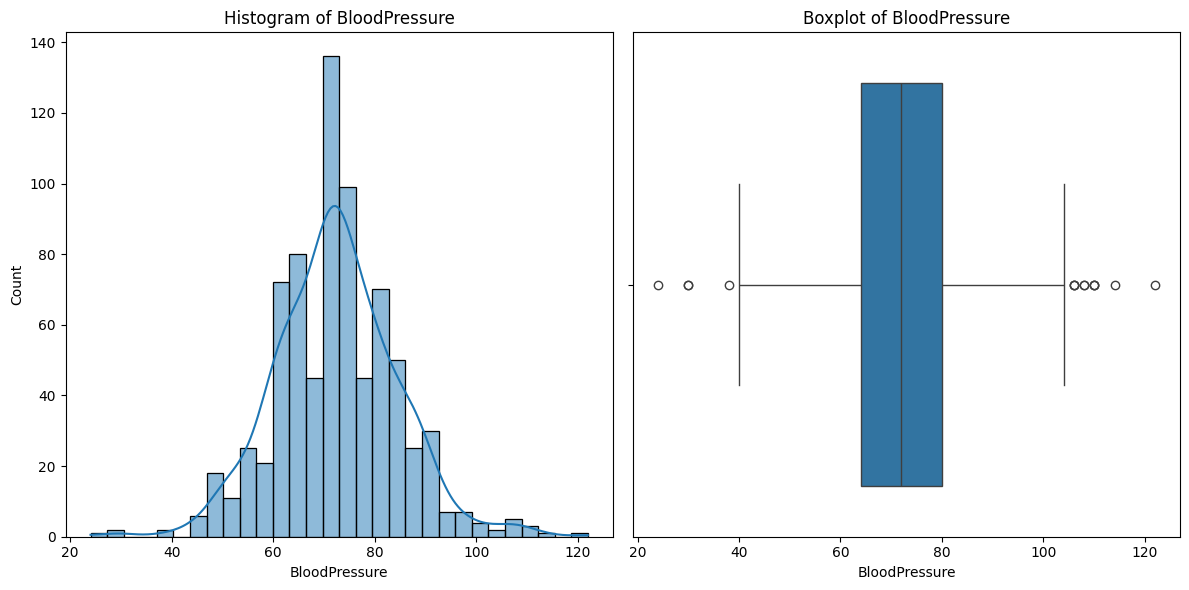

Analyzing Feature: SkinThickness
Skewness: 0.8359714894564462


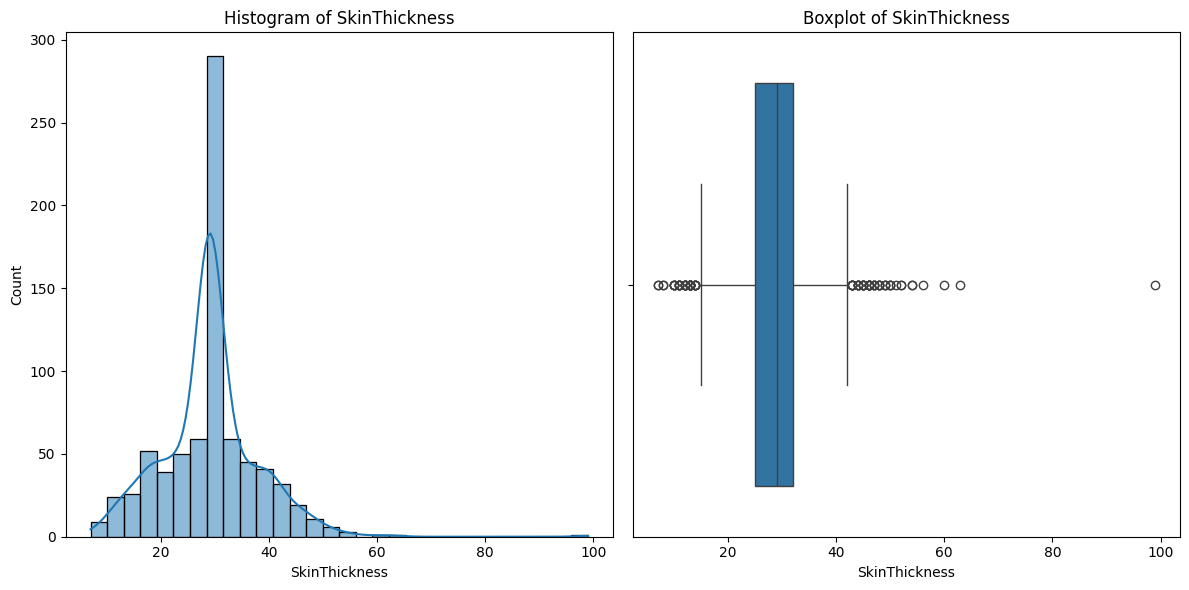

Analyzing Feature: Insulin
Skewness: 3.3734139434873414


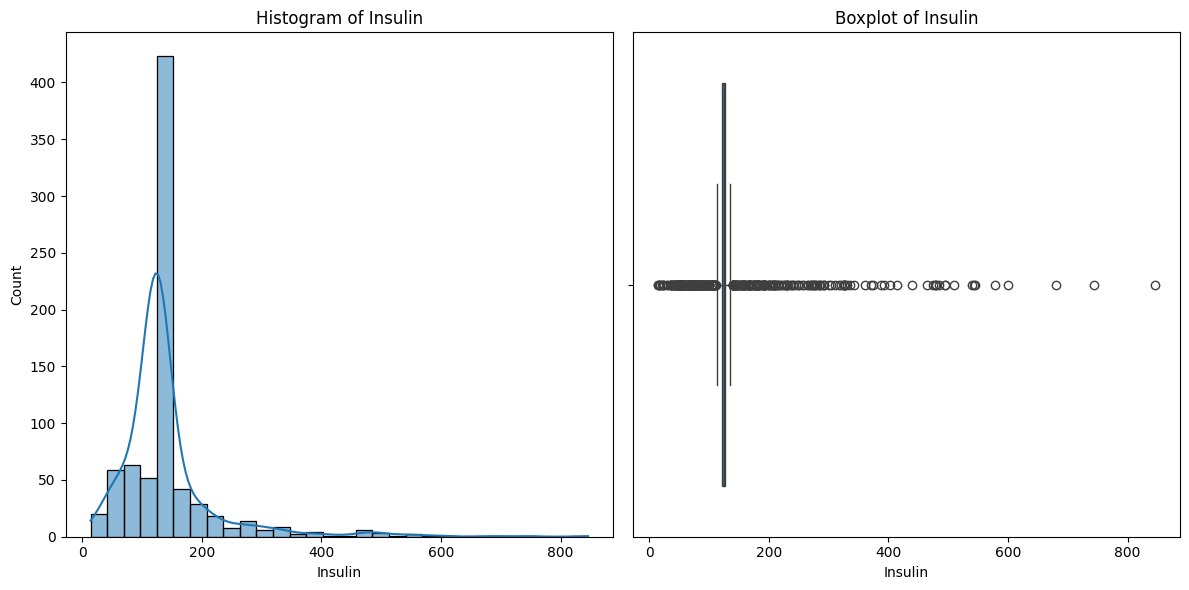

Analyzing Feature: BMI
Skewness: 0.5980615087222572


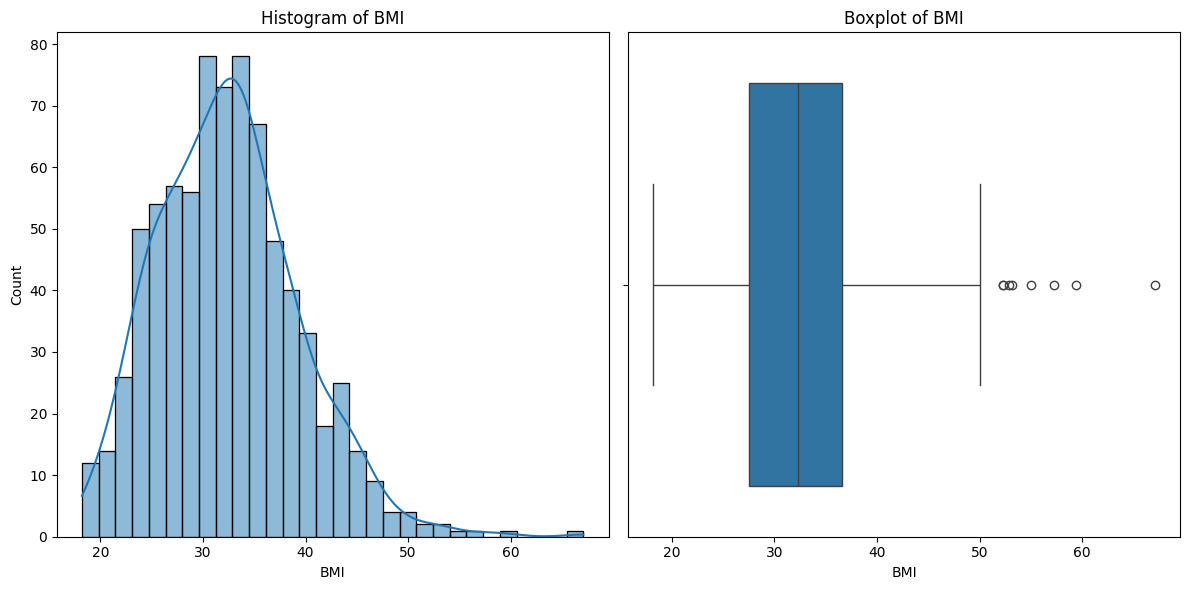

Analyzing Feature: DiabetesPedigreeFunction
Skewness: 1.9161592037386292


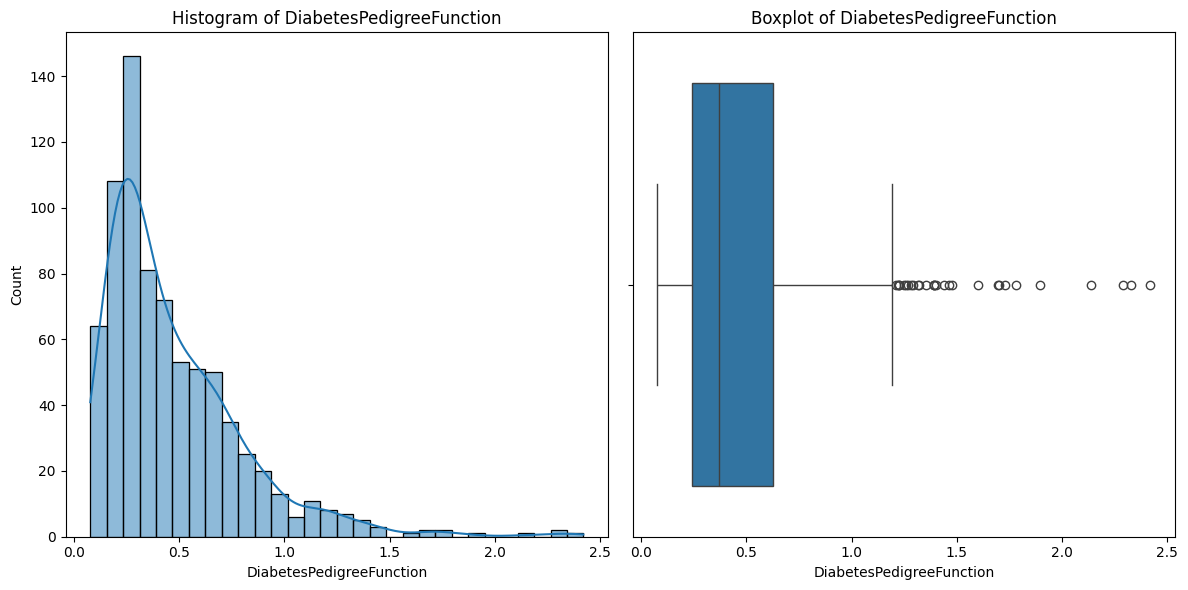

Analyzing Feature: Age
Skewness: 1.127389259531697


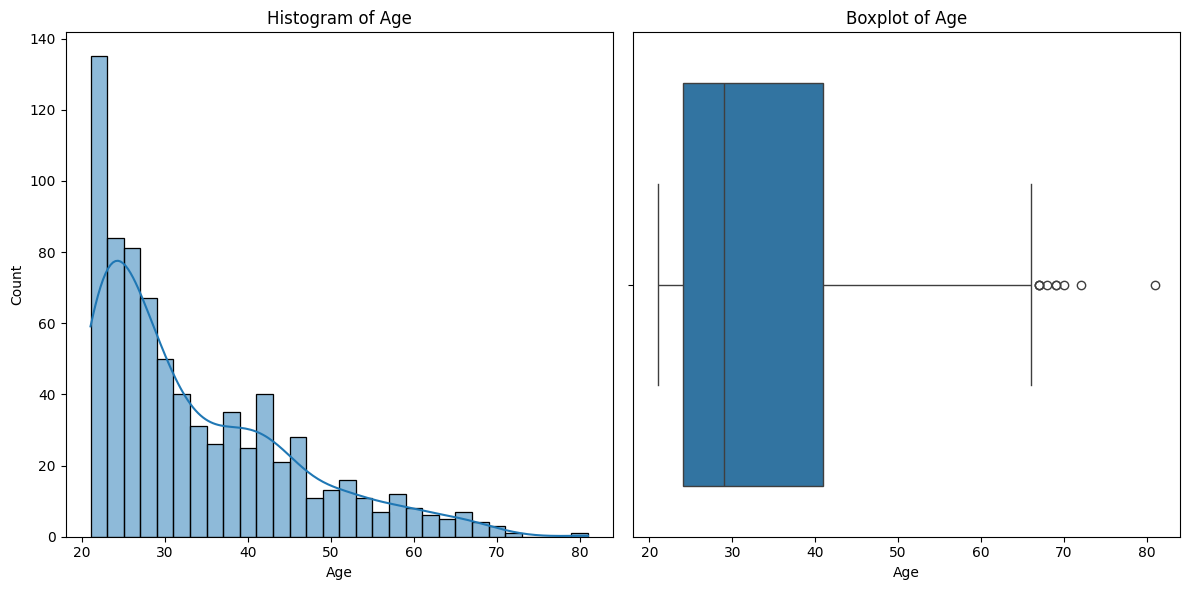

Analyzing Feature: Outcome
Skewness: 0.6337757030614577


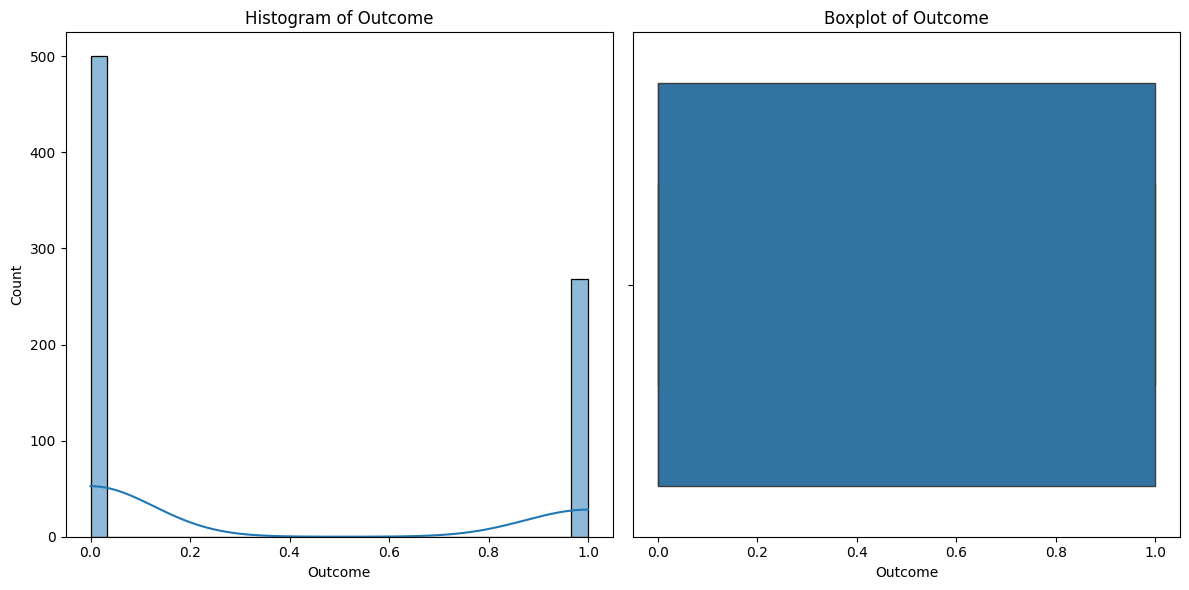

Analyzing Feature: Age
Skewness: -0.2027299102135712


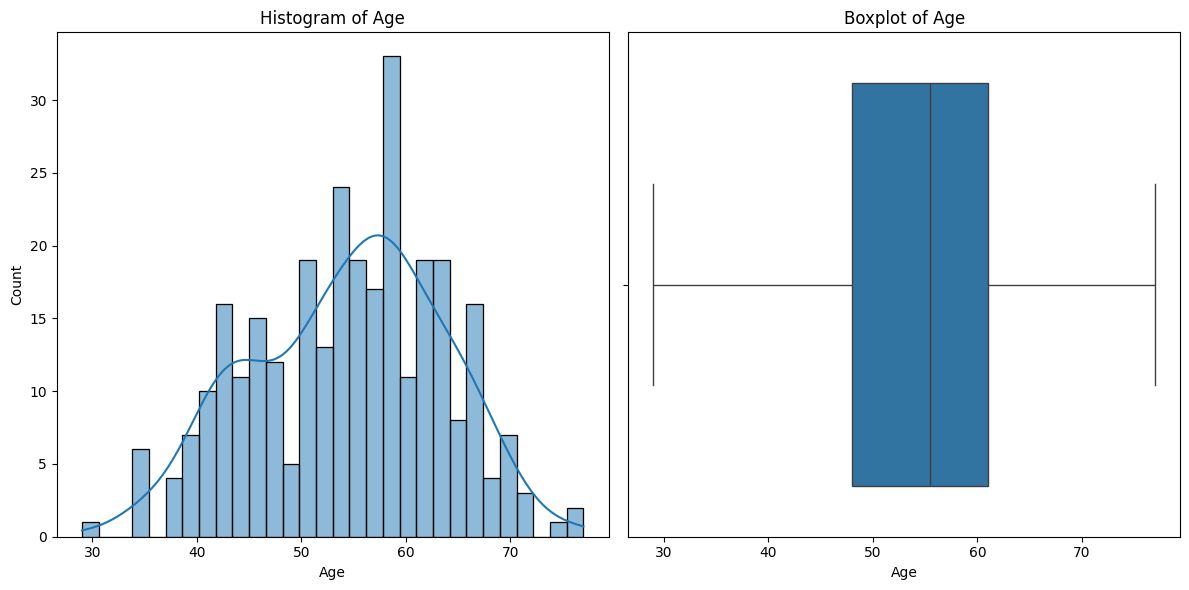

Analyzing Feature: sex
Skewness: -0.7822101704842899


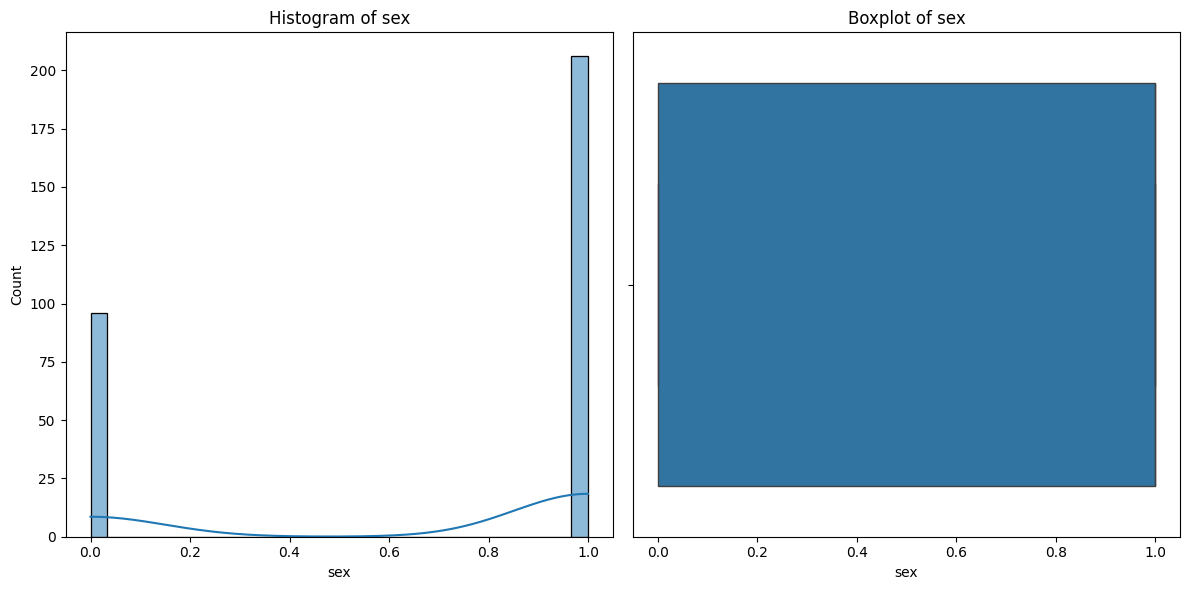

Analyzing Feature: cp
Skewness: 0.4905694049706952


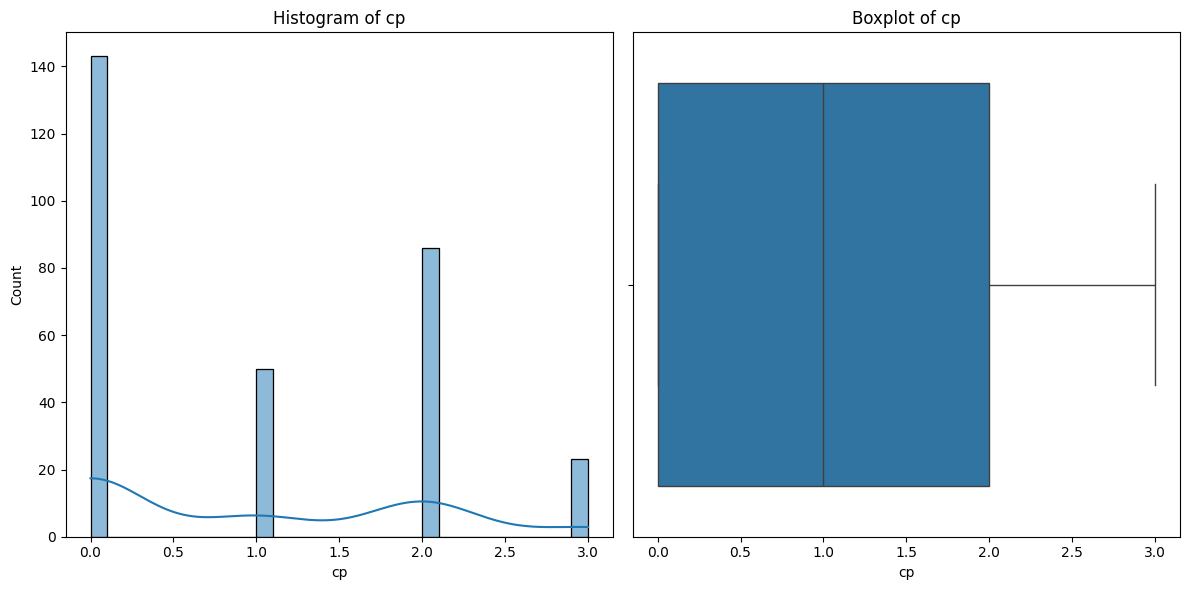

Analyzing Feature: trestbps
Skewness: 0.7129775303337106


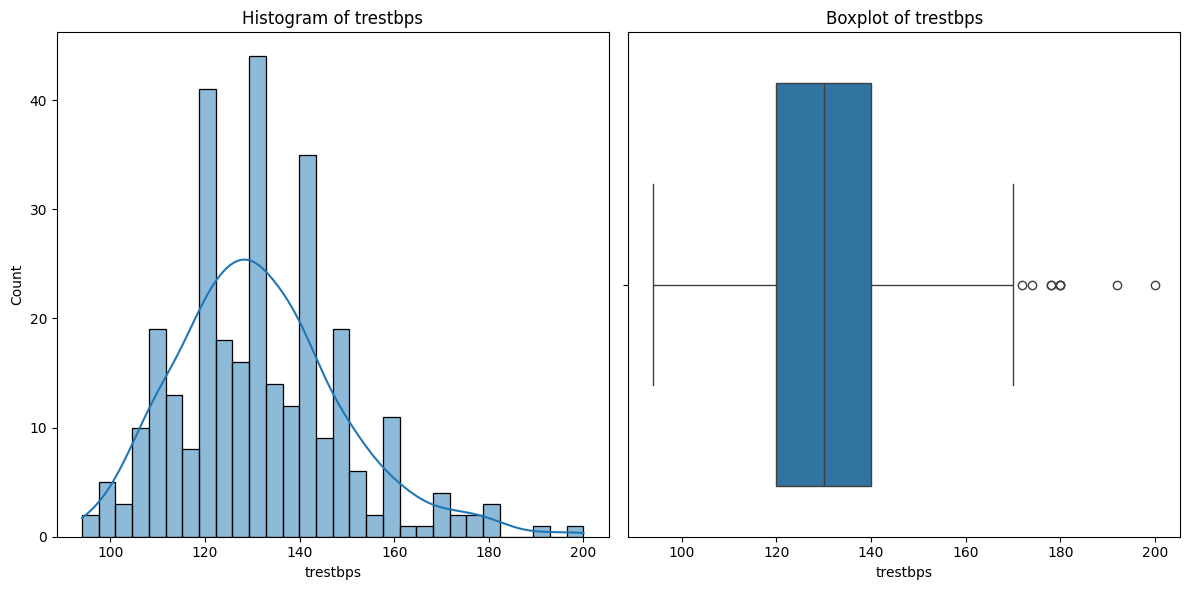

Analyzing Feature: chol
Skewness: 1.1416258623729787


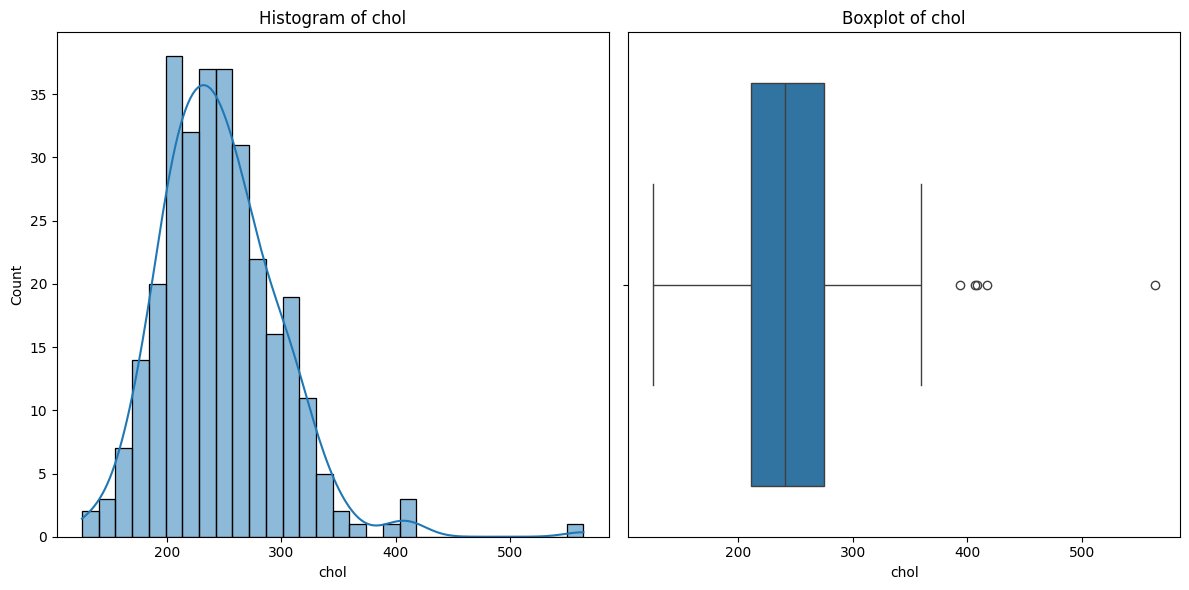

Analyzing Feature: fbs
Skewness: 1.9713468460359034


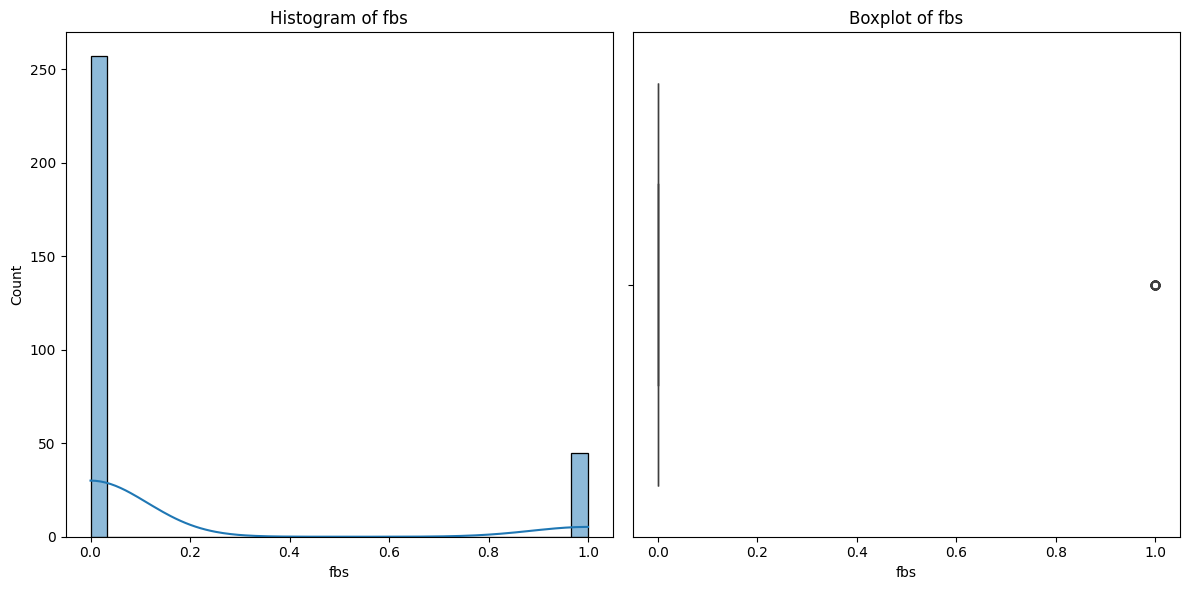

Analyzing Feature: restecg
Skewness: 0.16862371933679127


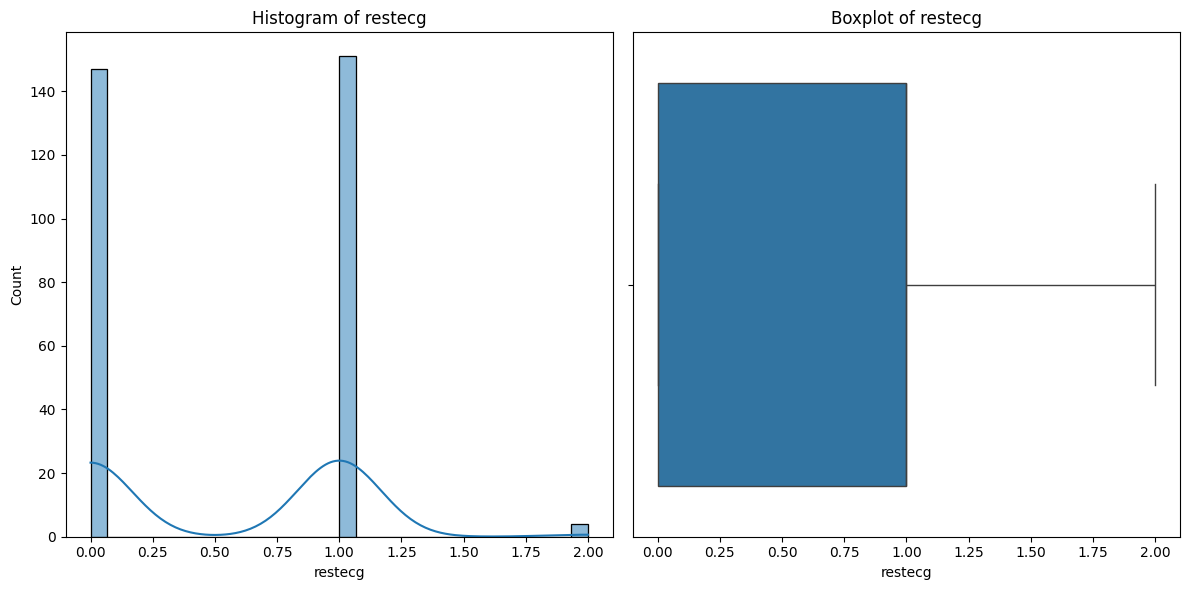

Analyzing Feature: thalach
Skewness: -0.5300218699527917


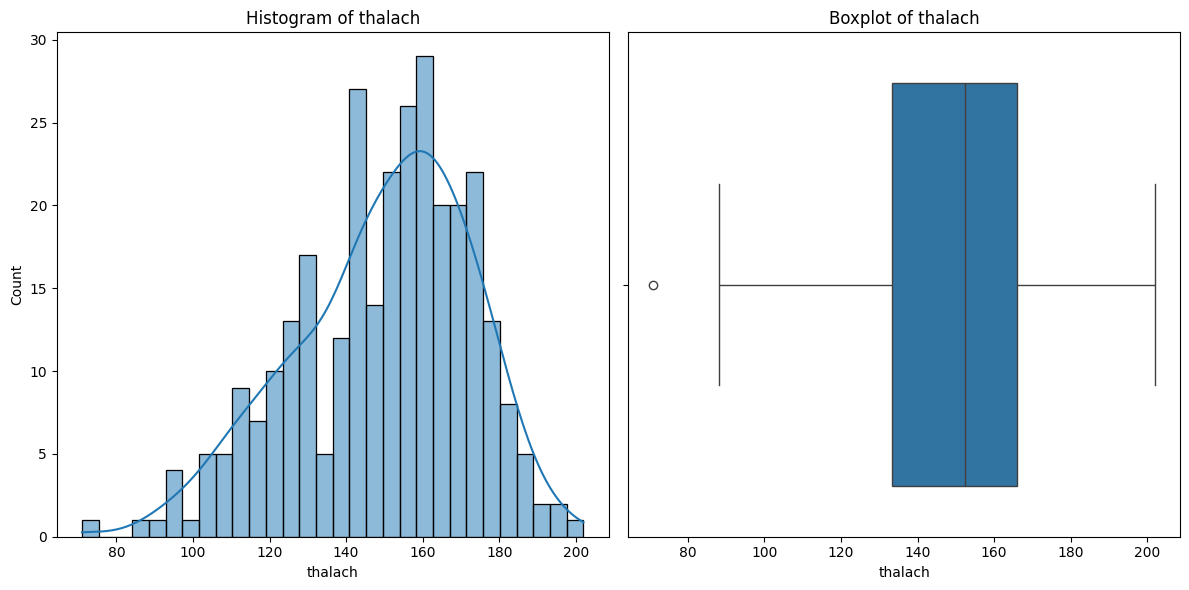

Analyzing Feature: exang
Skewness: 0.7336141898635072


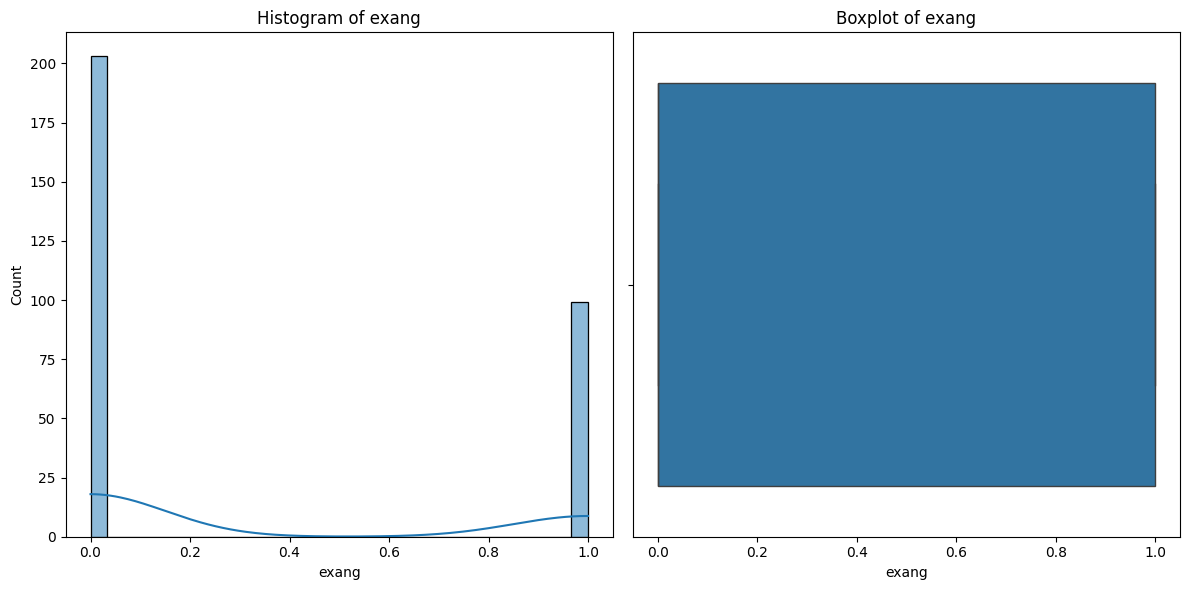

Analyzing Feature: oldpeak
Skewness: 1.2598750865993242


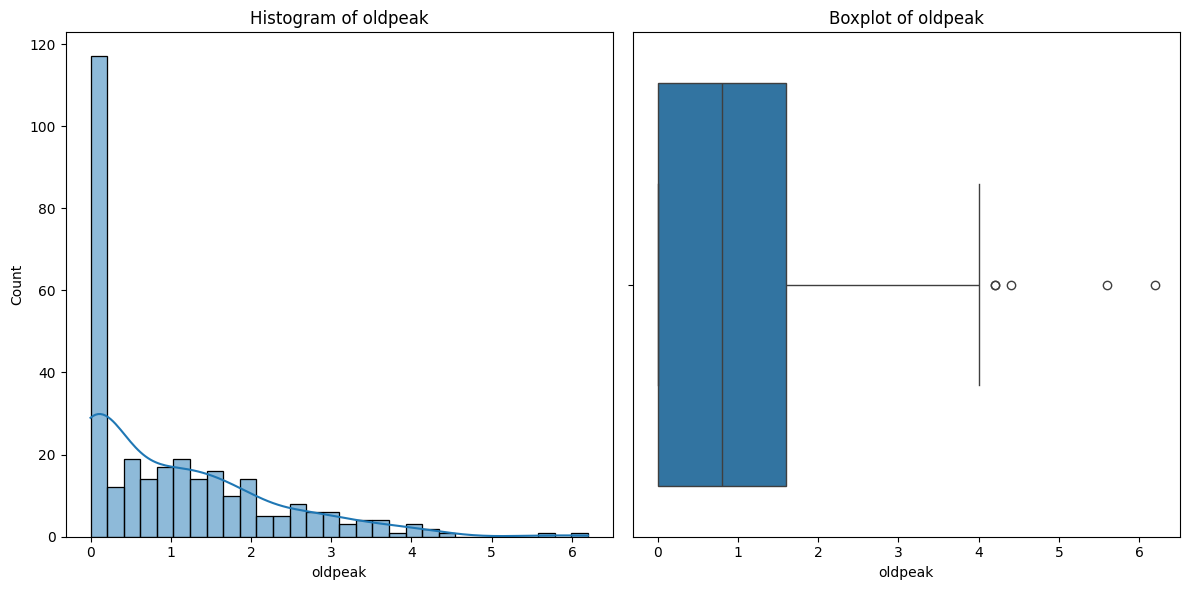

Analyzing Feature: slope
Skewness: -0.5007437158450276


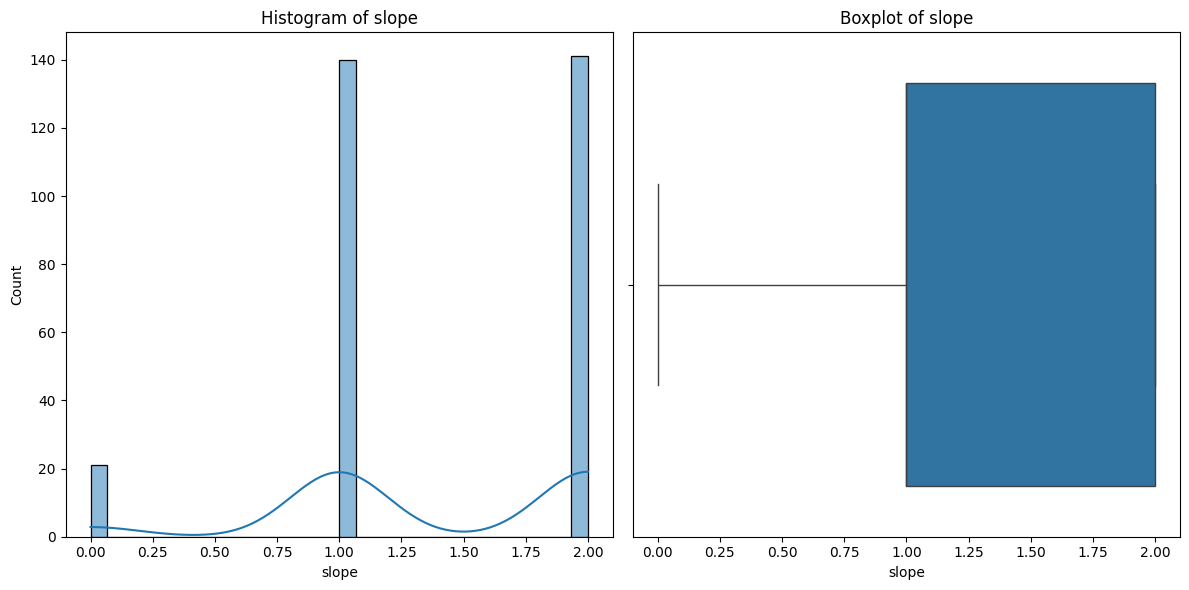

Analyzing Feature: ca
Skewness: 1.289293767717685


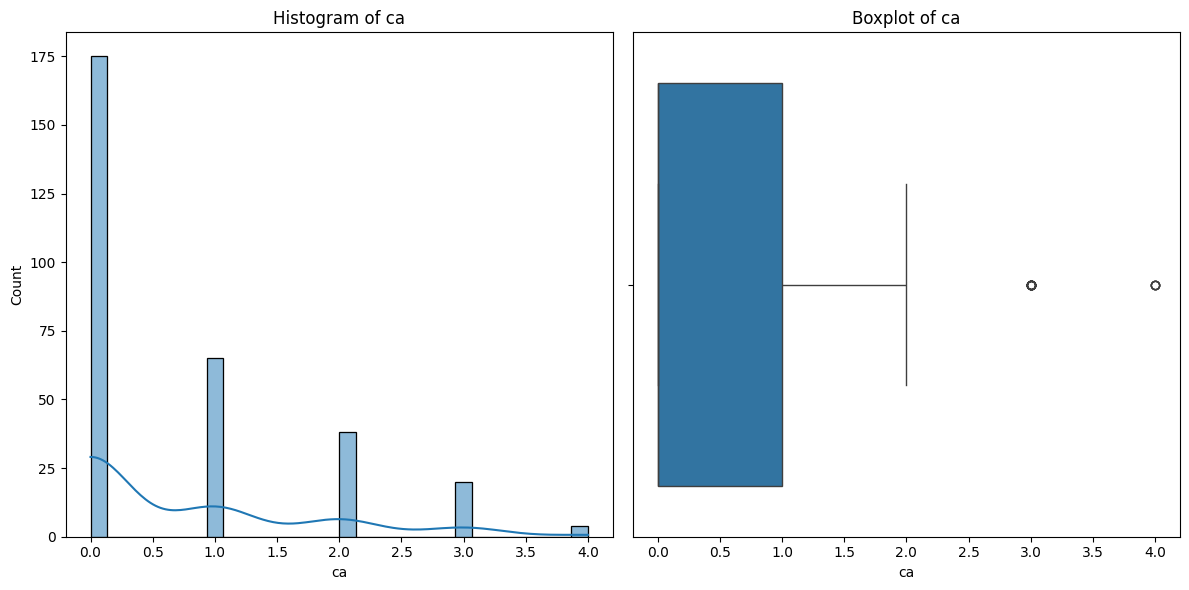

Analyzing Feature: thal
Skewness: -0.47883887652067786


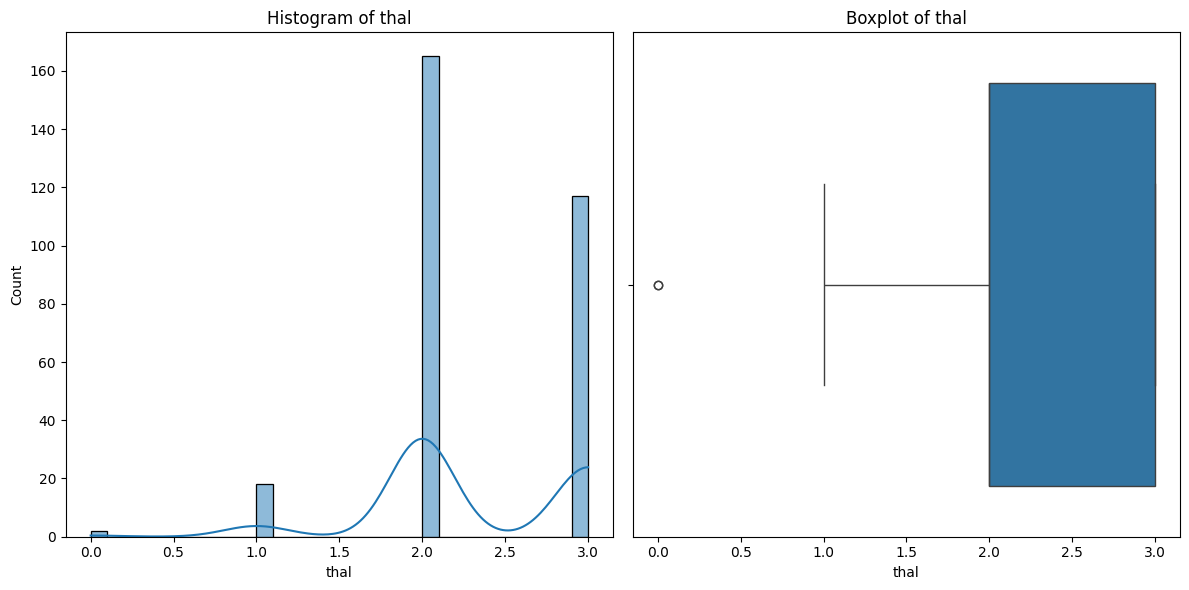

Analyzing Feature: target
Skewness: -0.172827115163089


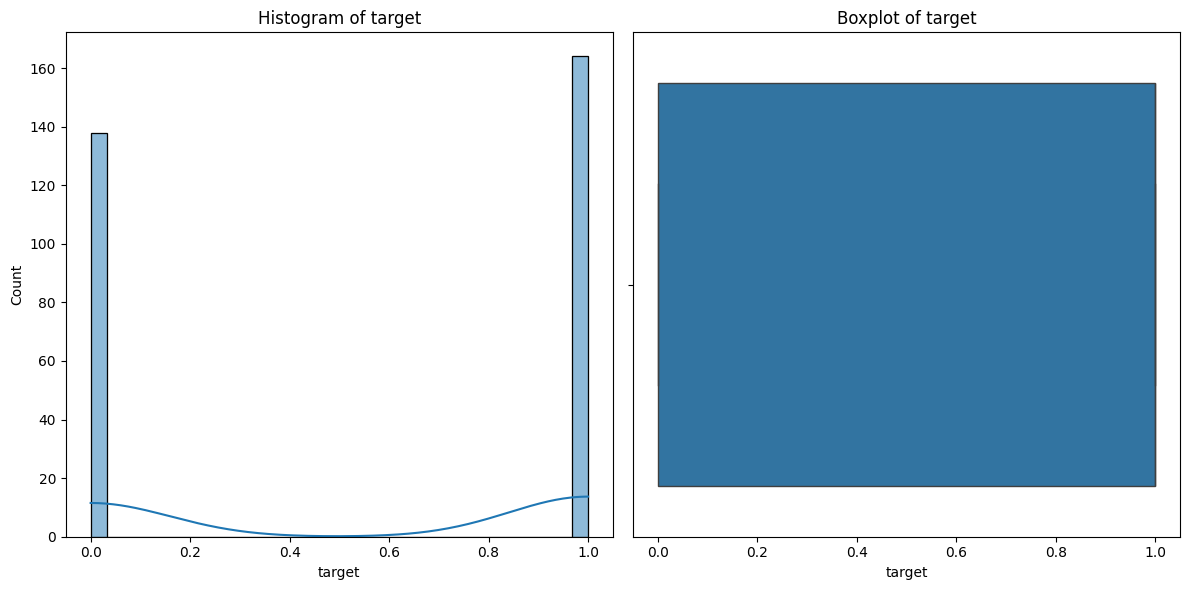

In [6]:
# Function to perform univariate analysis
def univariate_analysis(df):
    for column in df.columns:
        print(f"Analyzing Feature: {column}")
        
        # Calculate skewness
        skewness = skew(df[column].dropna())
        print(f"Skewness: {skewness}")
        
        # Plot histogram
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f"Histogram of {column}")
        
        # Plot boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot of {column}")
        
        plt.tight_layout()
        plt.show()

# Perform univariate analysis on diabetes_processed
univariate_analysis(diabetes_processed)

# Perform univariate analysis on heart_disease_processed
univariate_analysis(heart_disease_processed)

In [12]:
# Function to identify outliers using IQR
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Loop through all columns in the DataFrame and identify outliers
def identify_outliers_for_all_columns(df, dataset_name):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):  # Only process numeric columns
            print(f"Outliers for {column} in {dataset_name}:")
            outliers = identify_outliers_iqr(df, column)
            print(outliers)
            print("\n")

# Identify outliers for all columns in both datasets
identify_outliers_for_all_columns(diabetes_processed, "Diabetes Processed")
identify_outliers_for_all_columns(heart_disease_processed, "Heart Disease Processed")

Outliers for Pregnancies in Diabetes Processed:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15    136.0           70.0           32.0    110.0  37.1   
159           17    163.0           72.0           41.0    114.0  40.9   
298           14    100.0           78.0           25.0    184.0  36.6   
455           14    175.0           62.0           30.0    125.0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  


Outliers for Glucose in Diabetes Processed:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


Outliers for BloodPressure in Diabetes Processed:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
18             1    103.0           3

In [11]:
# Display column names for both DataFrames to identify valid columns
diabetes_columns = diabetes_processed.columns
heart_columns = heart_disease_processed.columns

print("Columns in Diabetes Processed DataFrame:")
print(diabetes_columns)

print("Columns in Heart Disease Processed DataFrame:")
print(heart_columns)

Columns in Diabetes Processed DataFrame:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Columns in Heart Disease Processed DataFrame:
Index(['Age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


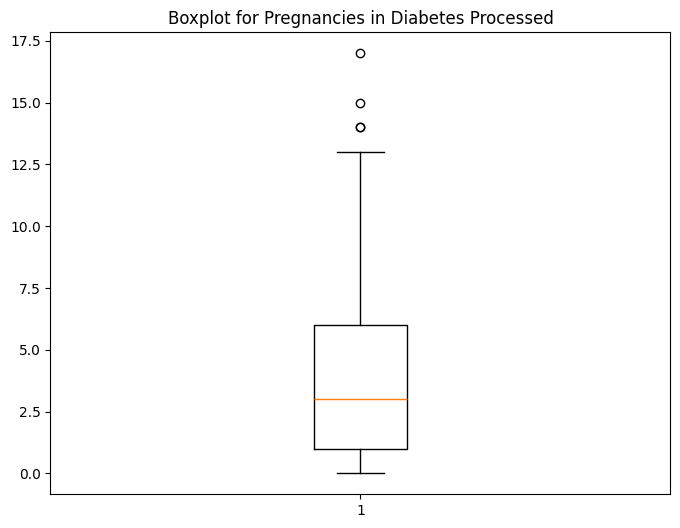

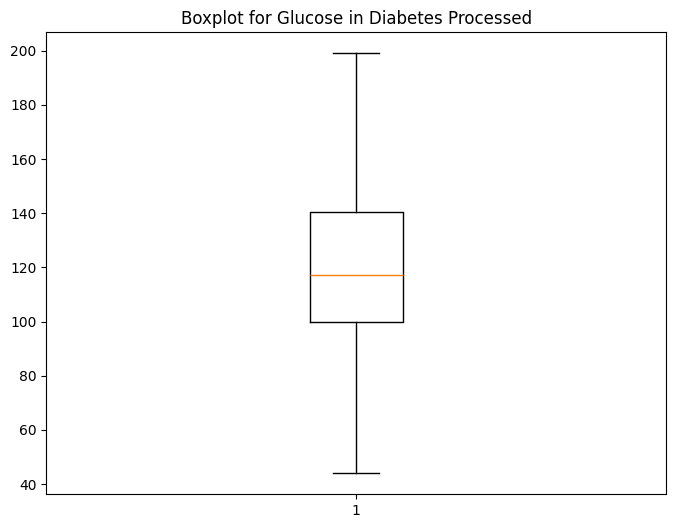

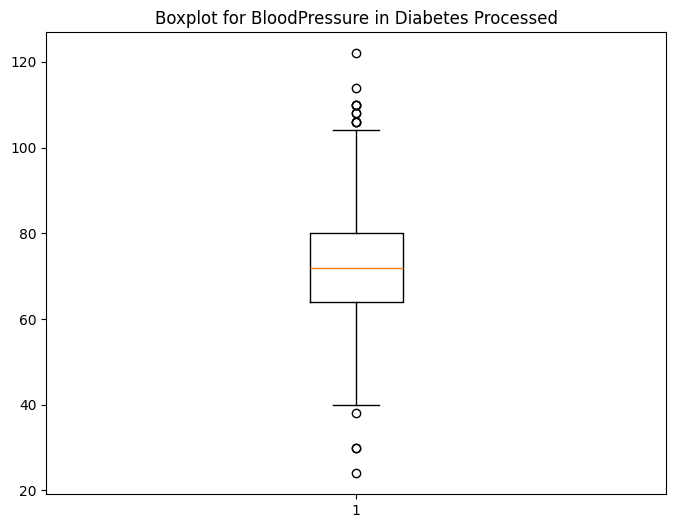

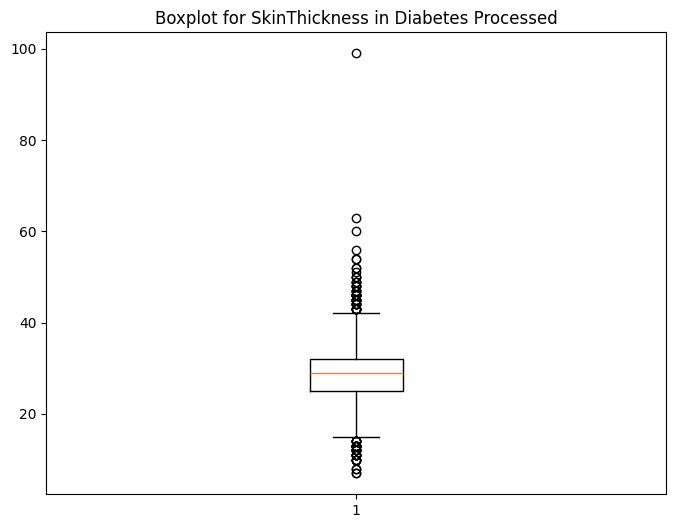

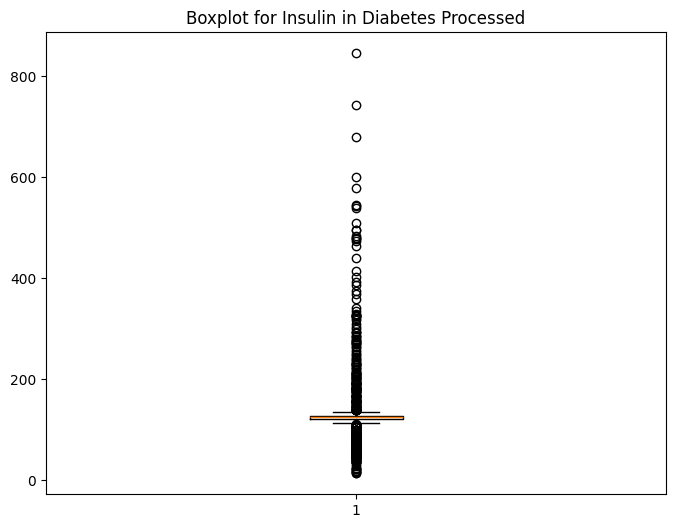

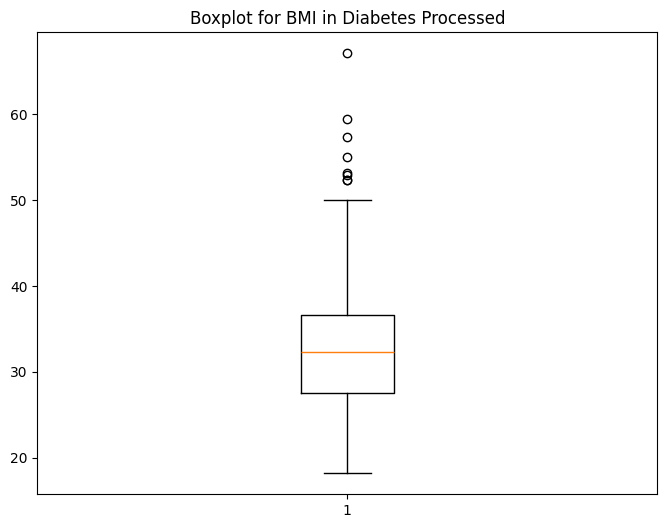

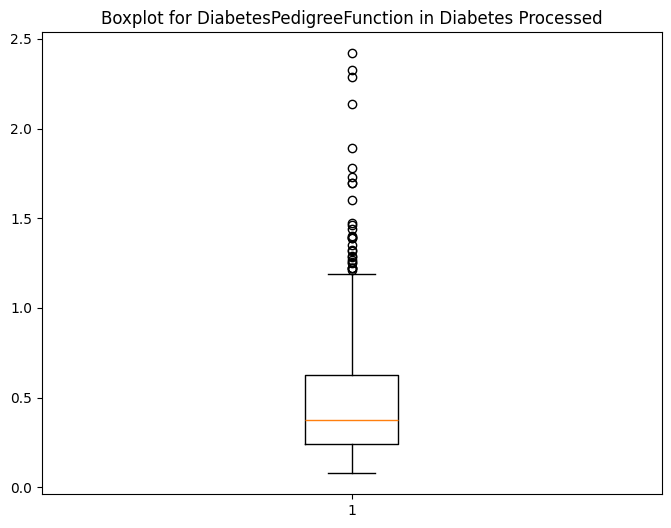

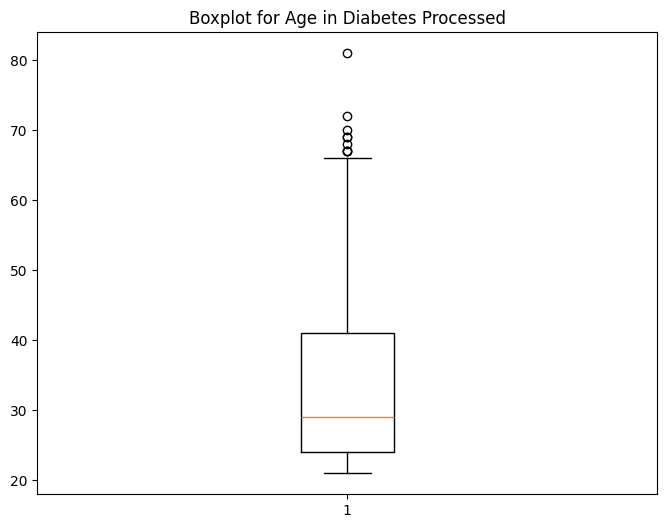

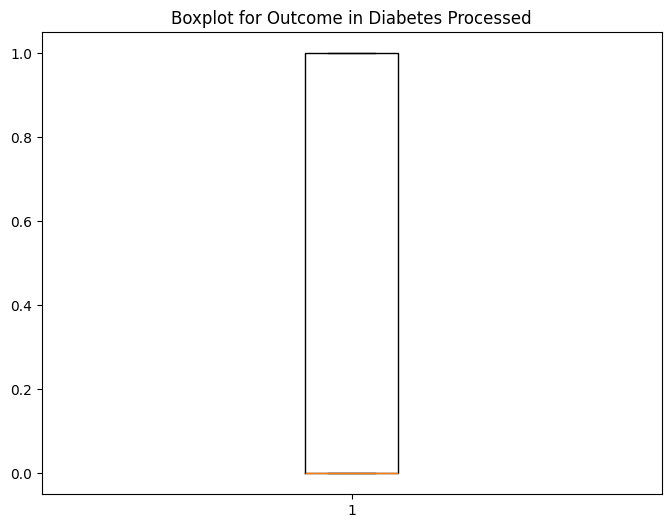

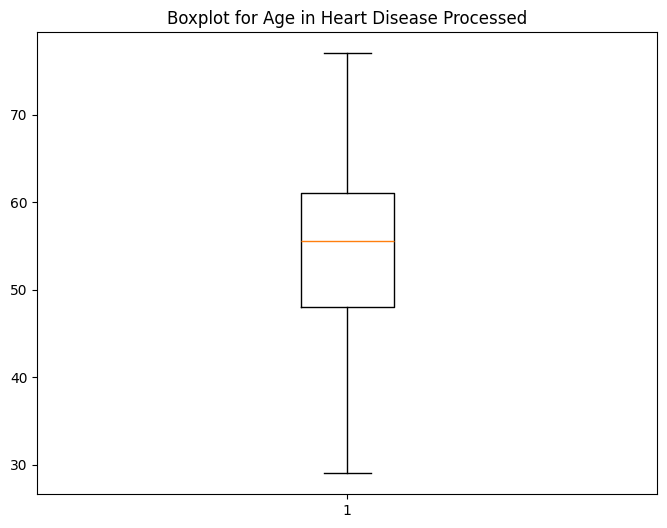

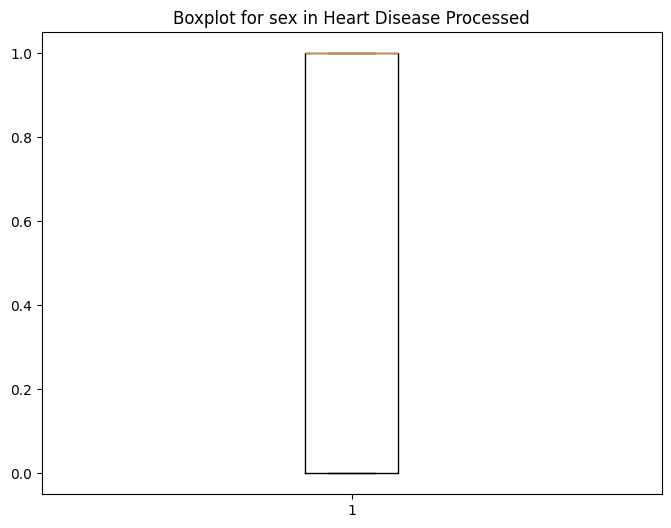

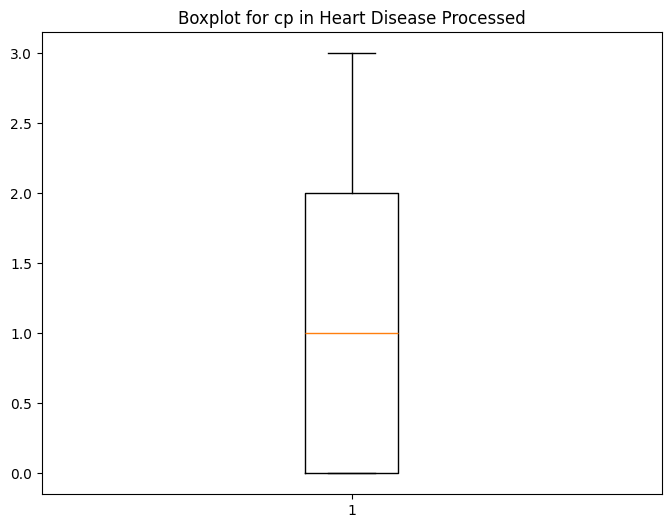

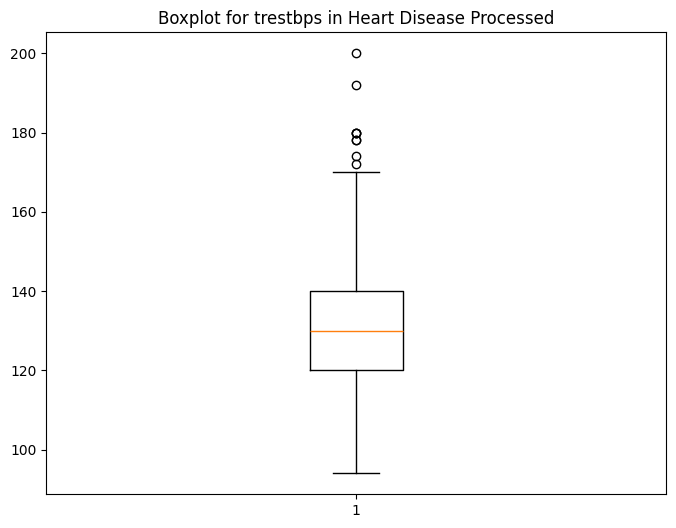

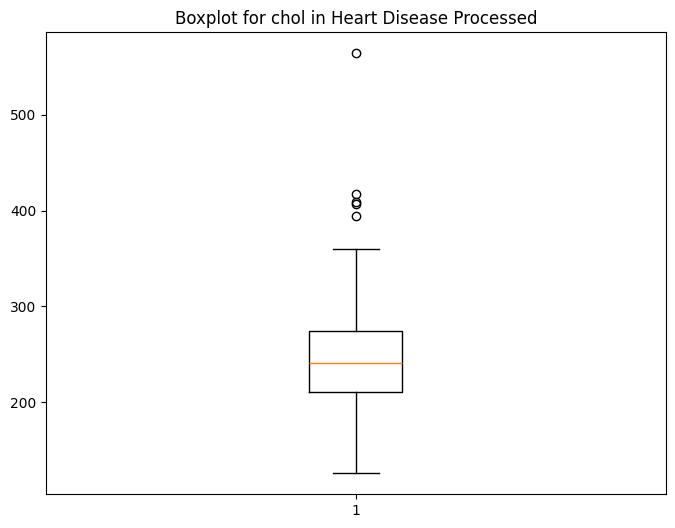

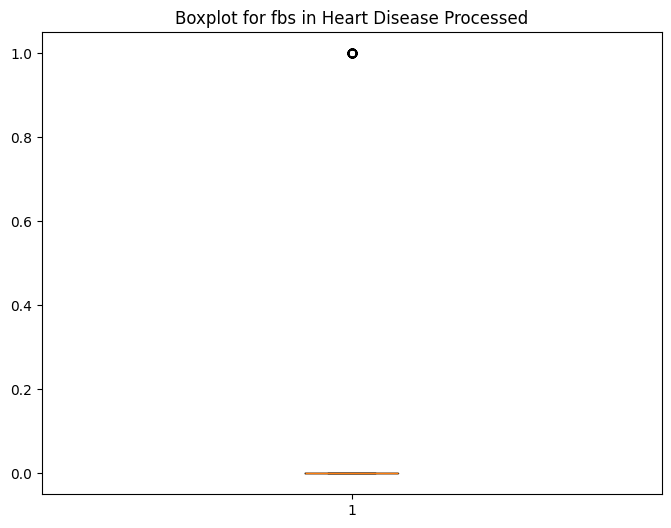

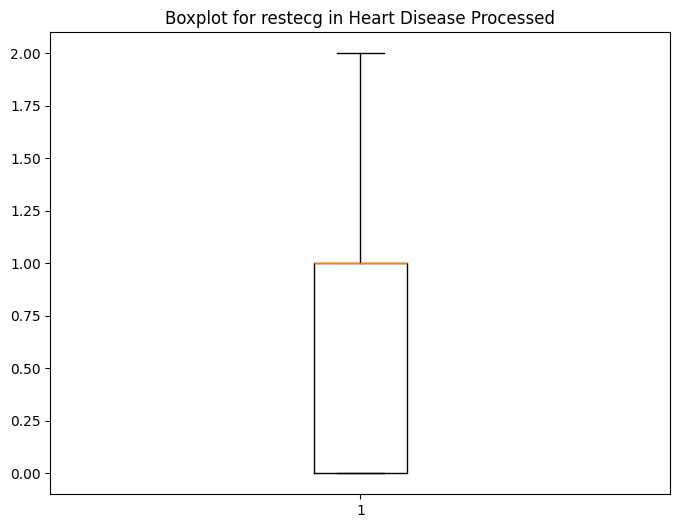

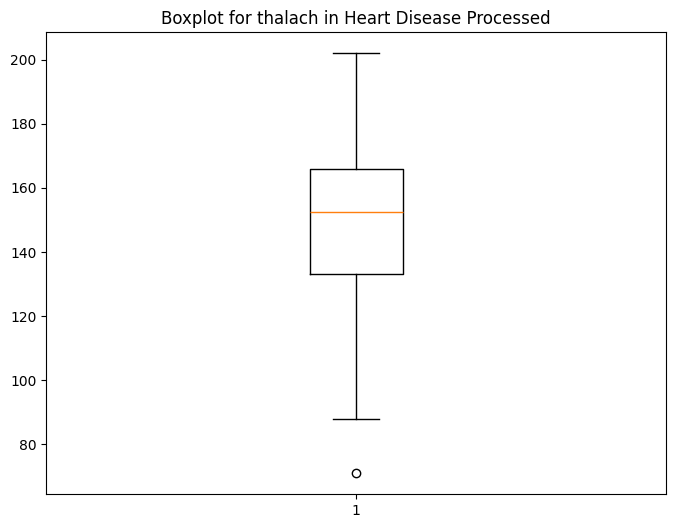

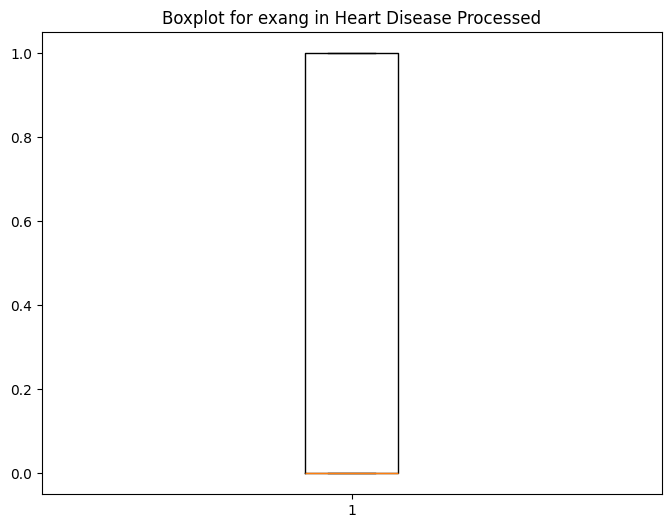

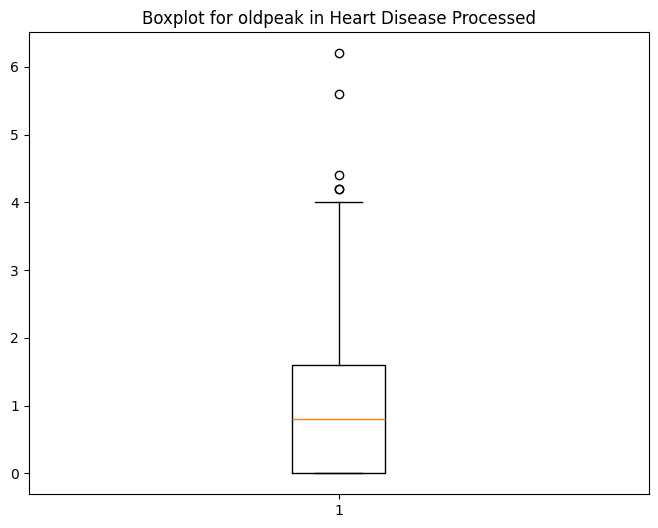

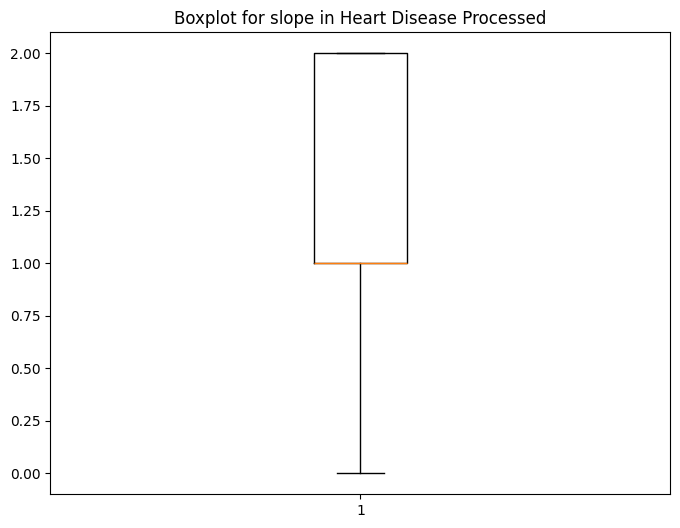

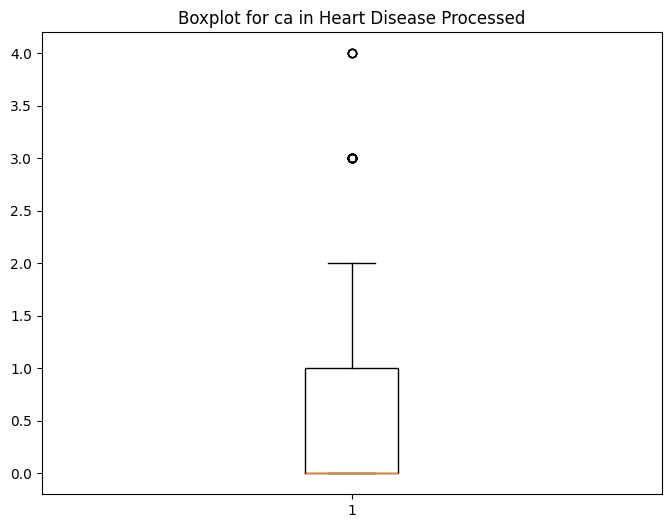

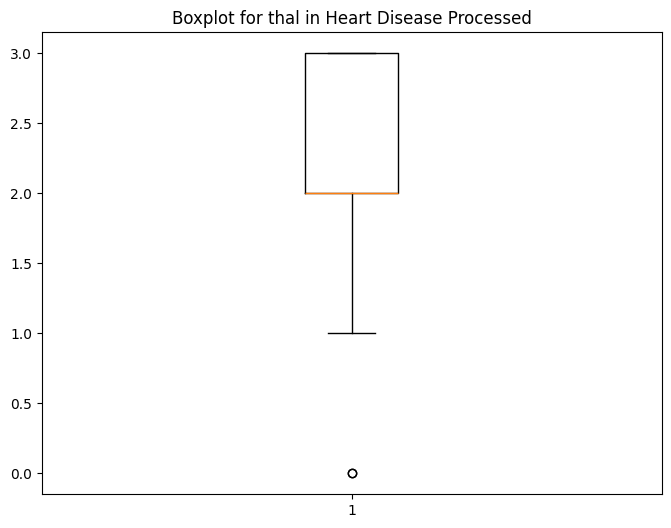

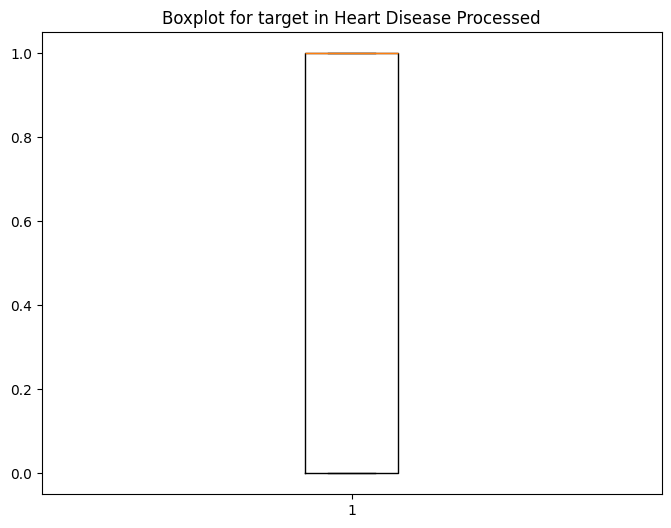

In [13]:
import matplotlib.pyplot as plt

# Function to create boxplots for all numeric columns in a dataset
def create_boxplots(df, dataset_name):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):  # Only process numeric columns
            plt.figure(figsize=(8, 6))
            plt.boxplot(df[column].dropna())
            plt.title(f'Boxplot for {column} in {dataset_name}')
            plt.show()

# Create boxplots for both datasets
create_boxplots(diabetes_processed, "Diabetes Processed")
create_boxplots(heart_disease_processed, "Heart Disease Processed")

Analyzing Feature: Pregnancies


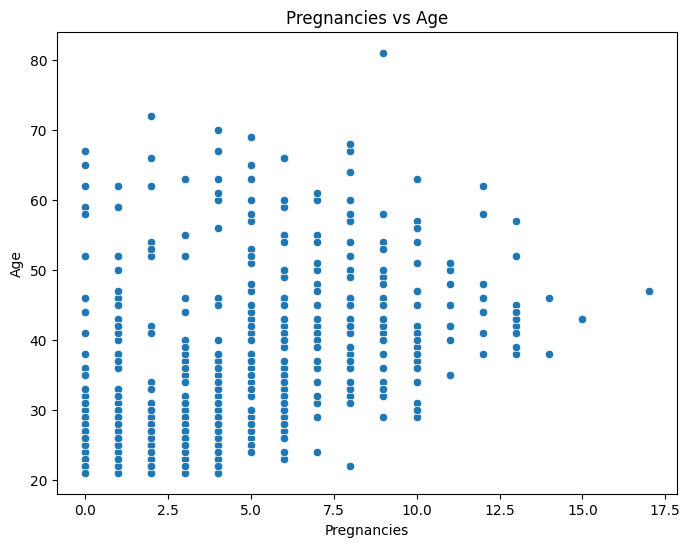

Analyzing Feature: Glucose


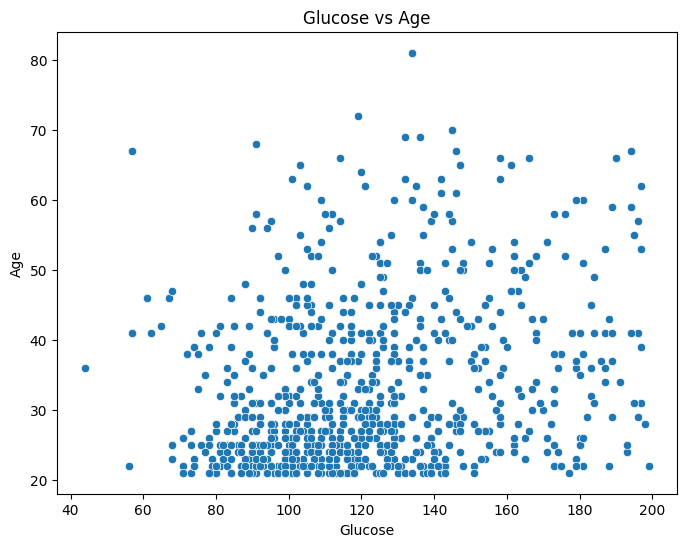

Analyzing Feature: BloodPressure


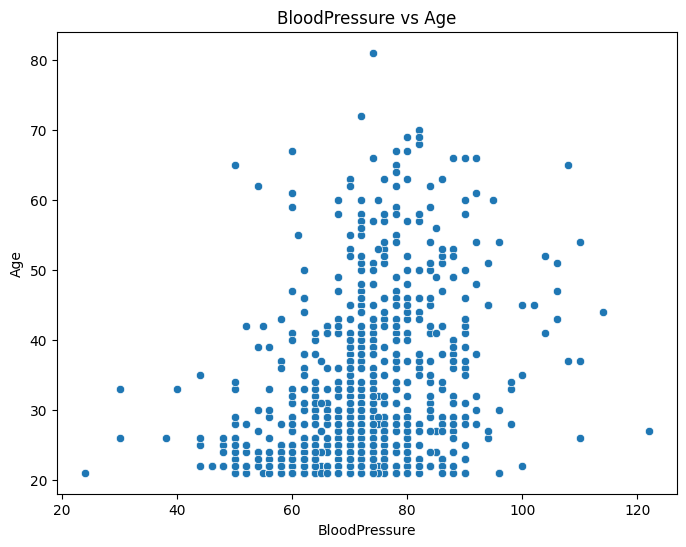

Analyzing Feature: SkinThickness


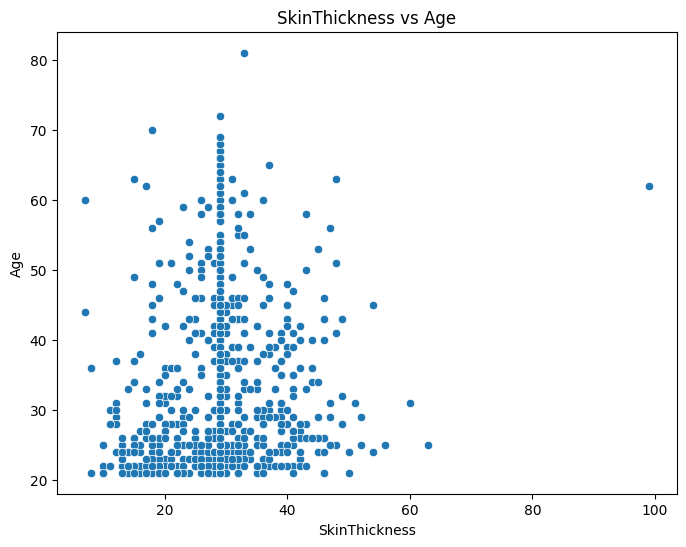

Analyzing Feature: Insulin


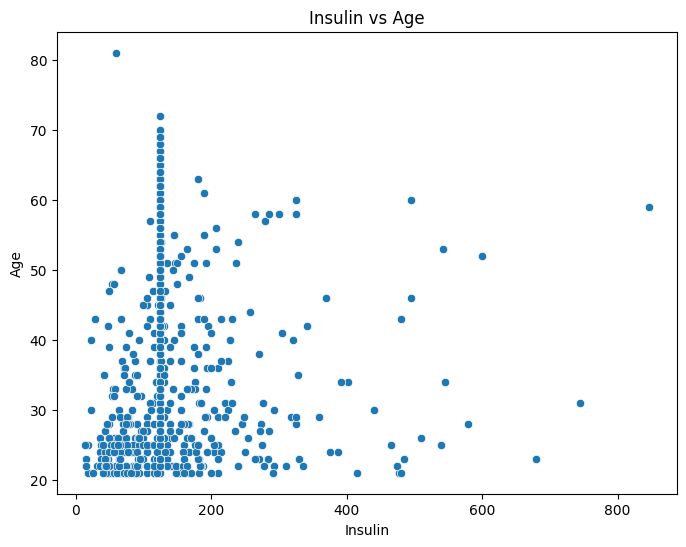

Analyzing Feature: BMI


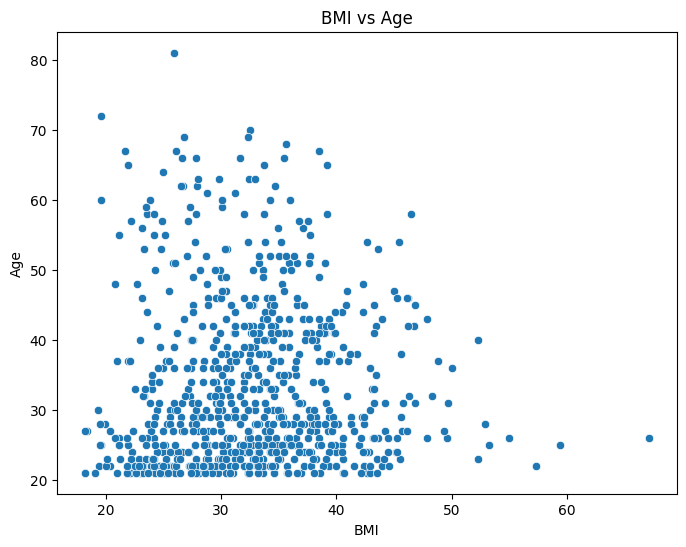

Analyzing Feature: DiabetesPedigreeFunction


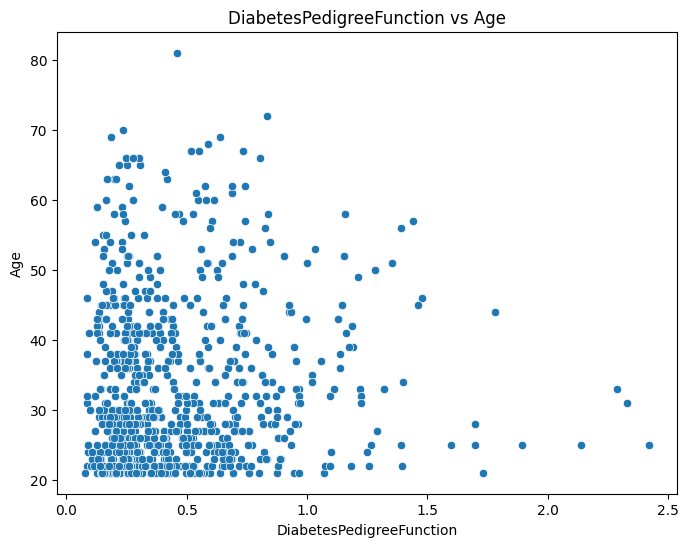

Analyzing Feature: Outcome


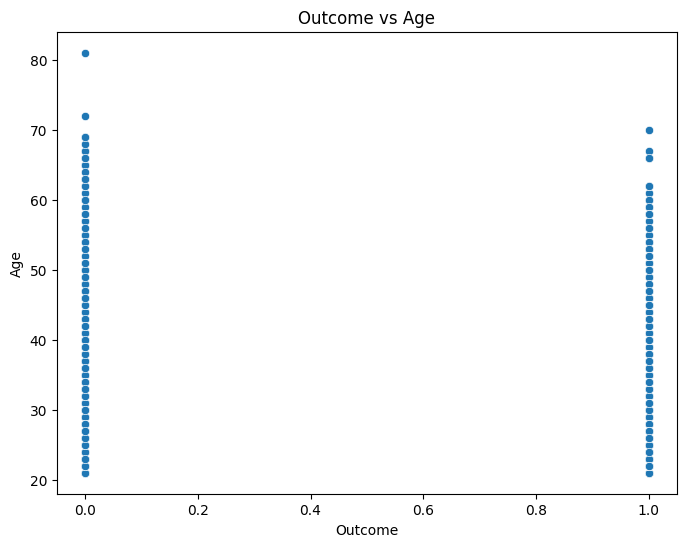

Analyzing Feature: sex


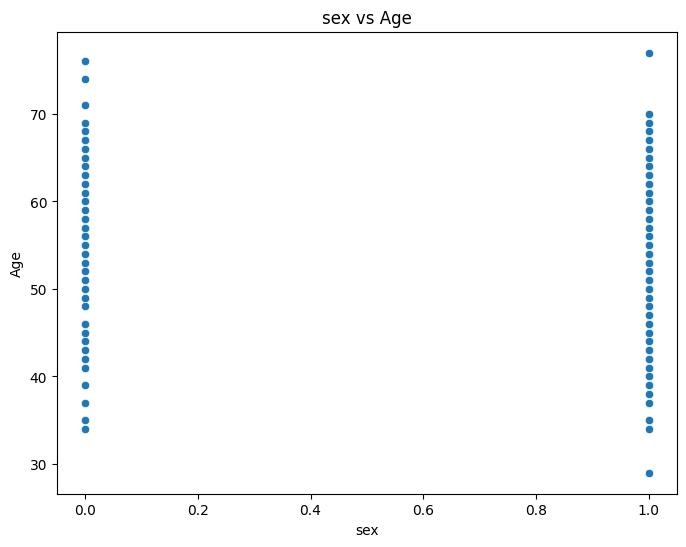

Analyzing Feature: cp


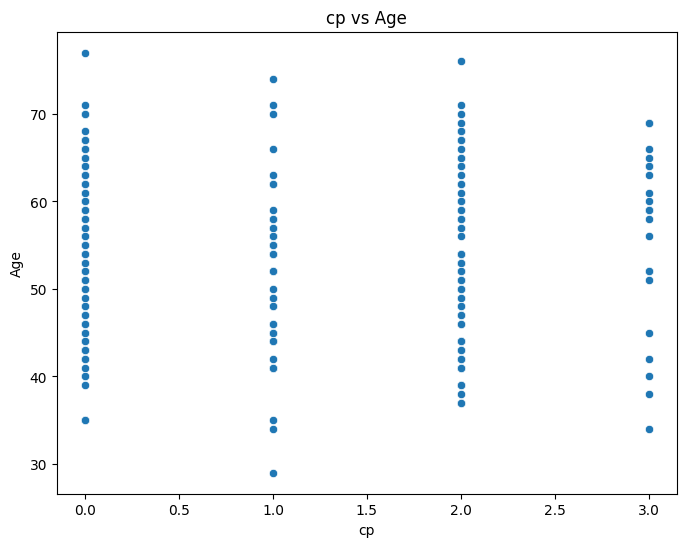

Analyzing Feature: trestbps


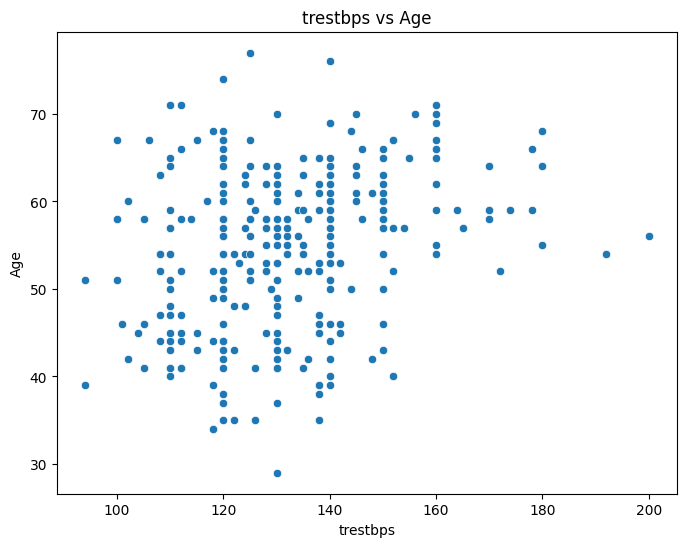

Analyzing Feature: chol


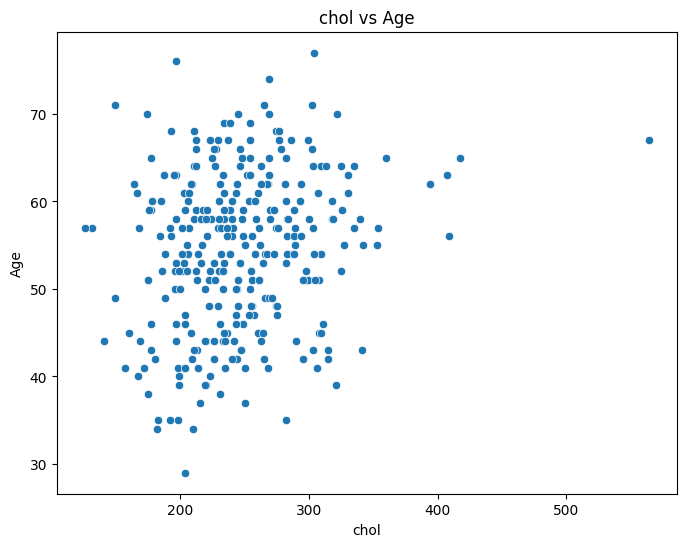

Analyzing Feature: fbs


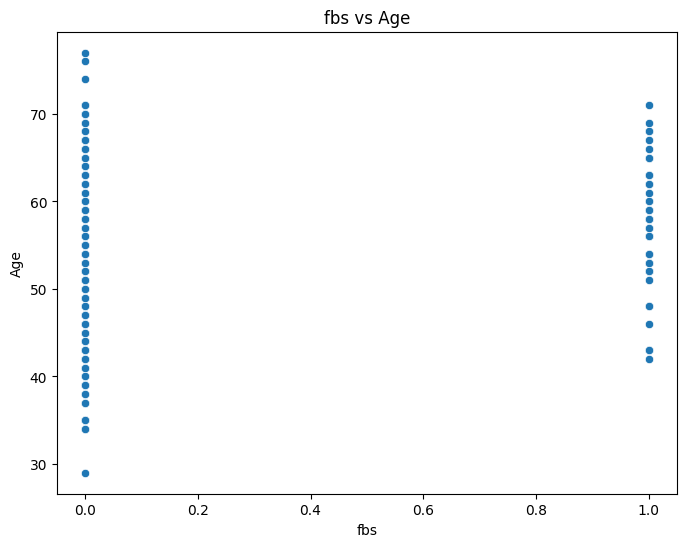

Analyzing Feature: restecg


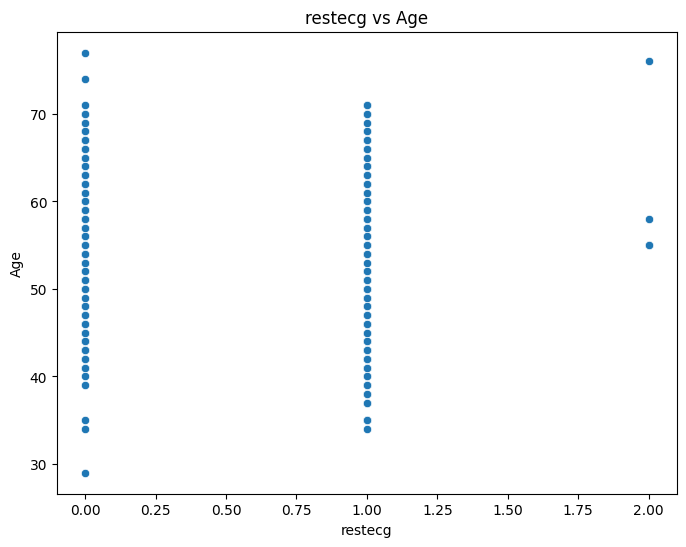

Analyzing Feature: thalach


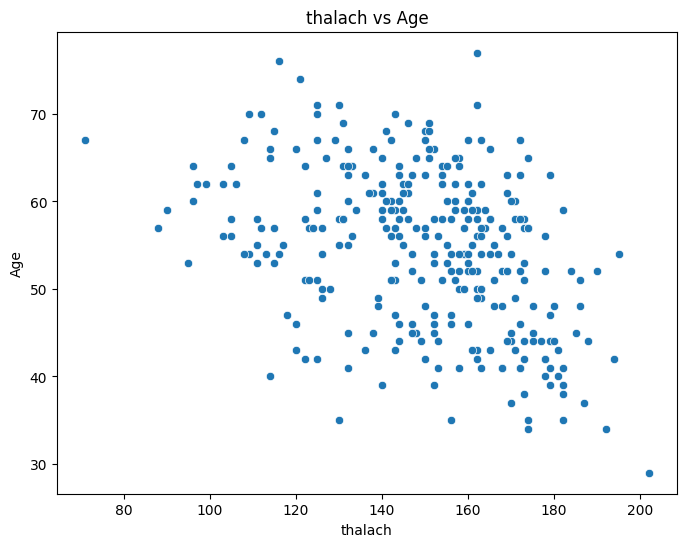

Analyzing Feature: exang


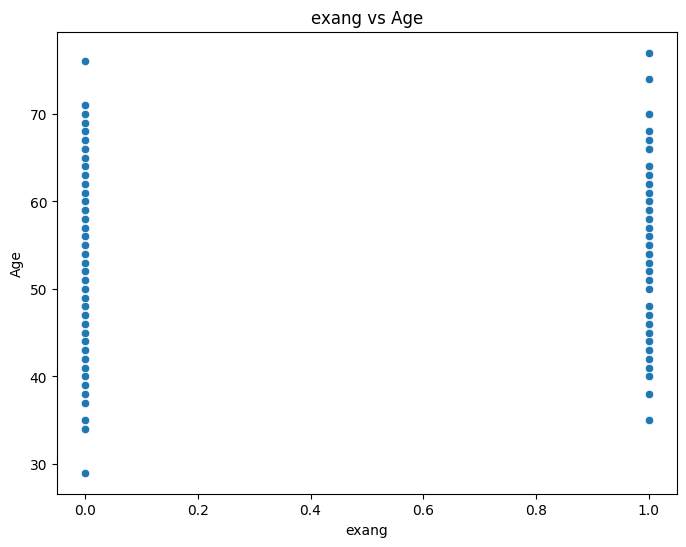

Analyzing Feature: oldpeak


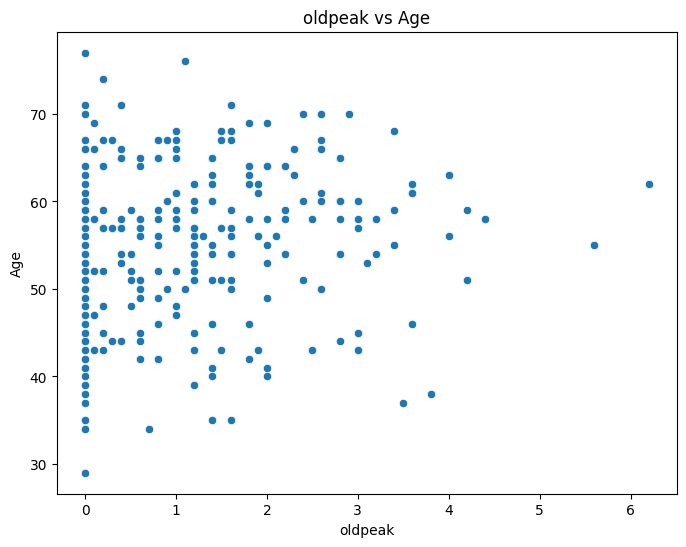

Analyzing Feature: slope


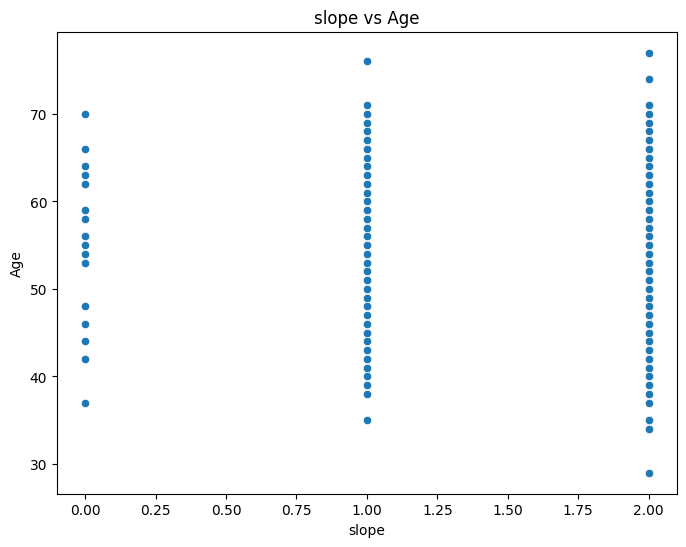

Analyzing Feature: ca


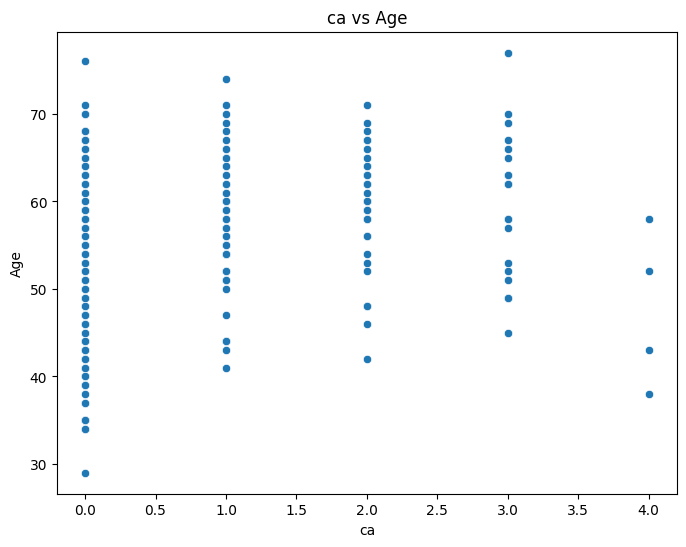

Analyzing Feature: thal


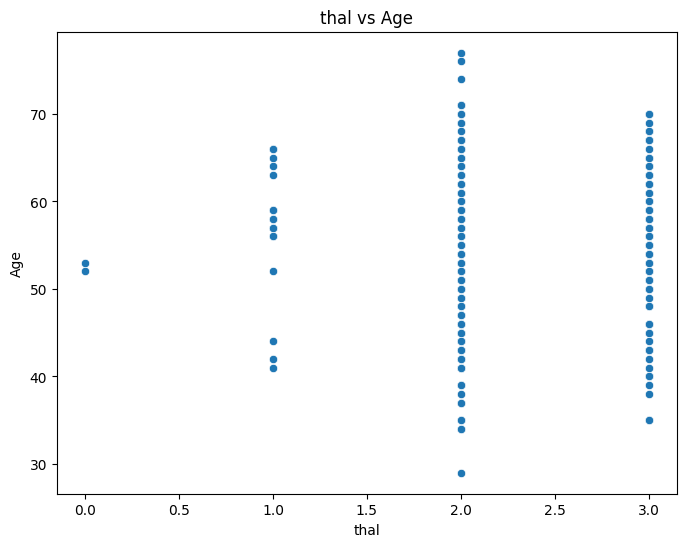

Analyzing Feature: target


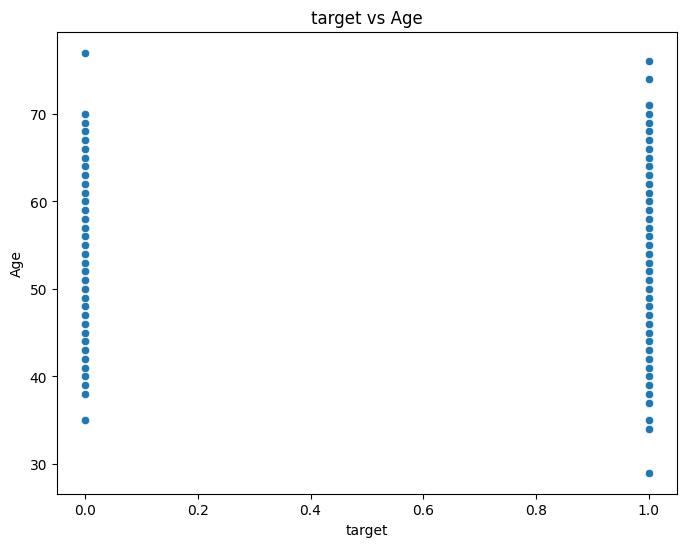

In [18]:
# Function for bivariate analysis
def bivariate_analysis(df, target):
    for column in df.columns:
        if column != target:
            print(f"Analyzing Feature: {column}")
            
            # Scatterplot for numerical features
            if pd.api.types.is_numeric_dtype(df[column]):
                plt.figure(figsize=(8, 6))
                sns.scatterplot(x=df[column], y=df[target])
                plt.title(f'{column} vs {target}')
                plt.show()
            
            # Boxplot for categorical features
            elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':
                plt.figure(figsize=(8, 6))
                sns.boxplot(x=df[column], y=df[target])
                plt.title(f'{column} vs {target}')
                plt.show()

# Perform bivariate analysis on diabetes_processed
bivariate_analysis(diabetes_processed, 'Age')# Replace 'target' with your target column name

# Perform bivariate analysis on heart_disease_processed
bivariate_analysis(heart_disease_processed, 'Age')  # Replace 'target' with your target column name